In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv("../input/train.csv")

In [3]:
df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.00,"This is so cool. It's like, 'would you want yo...",0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:41.987077+00,2,nan,2006,rejected,0,0,0,0,0,0.00,0,4
1,59849,0.00,Thank you!! This would make my life a lot less...,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:42.870083+00,2,nan,2006,rejected,0,0,0,0,0,0.00,0,4
2,59852,0.00,This is such an urgent design problem; kudos t...,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:45.222647+00,2,nan,2006,rejected,0,0,0,0,0,0.00,0,4
3,59855,0.00,Is this something I'll be able to install on m...,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:47.601894+00,2,nan,2006,rejected,0,0,0,0,0,0.00,0,4
4,59856,0.89,haha you guys are a bunch of losers.,0.02,0.00,0.02,0.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-09-29 10:50:48.488476+00,2,nan,2006,rejected,0,0,0,1,0,0.00,4,47
5,59859,0.67,ur a sh*tty comment.,0.05,0.64,0.00,0.33,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:50.865549+00,2,nan,2006,rejected,0,0,0,0,0,0.01,0,105
6,59861,0.46,hahahahahahahahhha suck it.,0.05,0.31,0.00,0.25,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:52.451277+00,2,nan,2006,rejected,0,0,0,0,0,0.22,0,59
7,59863,0.00,FFFFUUUUUUUUUUUUUUU,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:54.055221+00,2,nan,2006,rejected,0,0,0,0,0,0.00,0,4
8,239575,0.00,The ranchers seem motivated by mostly by greed...,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2016-01-13 18:01:05.156229+00,6,nan,26662,approved,0,0,0,0,0,0.00,0,4
9,239576,0.00,It was a great show. Not a combo I'd of expect...,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2016-01-13 18:11:21.570460+00,6,"239,522.00",26650,approved,0,0,0,1,0,0.00,0,4


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,"1,804,874.00","3,738,433.79","2,445,186.76","59,848.00","796,975.25","5,223,774.50","5,769,854.50","6,334,010.00"
target,"1,804,874.00",0.10,0.20,0.00,0.00,0.00,0.17,1.00
severe_toxicity,"1,804,874.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
obscene,"1,804,874.00",0.01,0.06,0.00,0.00,0.00,0.00,1.00
identity_attack,"1,804,874.00",0.02,0.08,0.00,0.00,0.00,0.00,1.00
insult,"1,804,874.00",0.08,0.18,0.00,0.00,0.00,0.09,1.00
threat,"1,804,874.00",0.01,0.05,0.00,0.00,0.00,0.00,1.00
asian,"405,130.00",0.01,0.09,0.00,0.00,0.00,0.00,1.00
atheist,"405,130.00",0.00,0.05,0.00,0.00,0.00,0.00,1.00
bisexual,"405,130.00",0.00,0.03,0.00,0.00,0.00,0.00,1.00


In [5]:
corr = df.drop(["id", "publication_id", "parent_id", "article_id"], axis=1).corr()

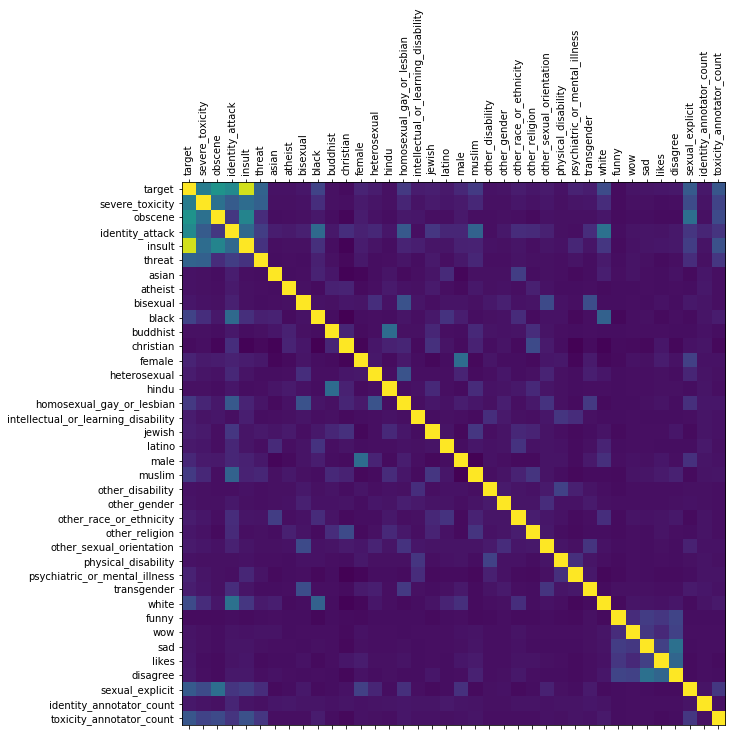

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns);

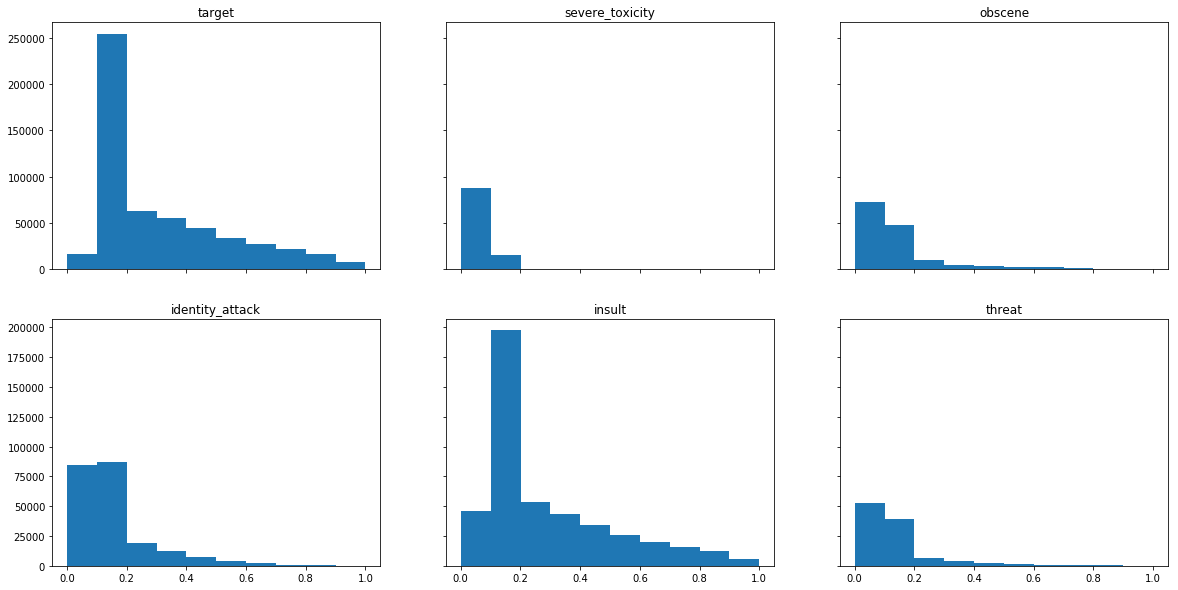

In [7]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(20, 10))
for i, metric in enumerate(['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']):
    ax[i // 3, i % 3].set_title(metric)
    ax[i // 3, i % 3].hist(df[df[metric] > 0][metric], bins = 10)

In [8]:
identities = ['asian', 'atheist', 'bisexual',
    'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
    'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
    'jewish', 'latino', 'male', 'muslim', 'other_disability',
    'other_gender', 'other_race_or_ethnicity', 'other_religion',
    'other_sexual_orientation', 'physical_disability',
    'psychiatric_or_mental_illness', 'transgender', 'white']

In [10]:
df_without_na = df.dropna()

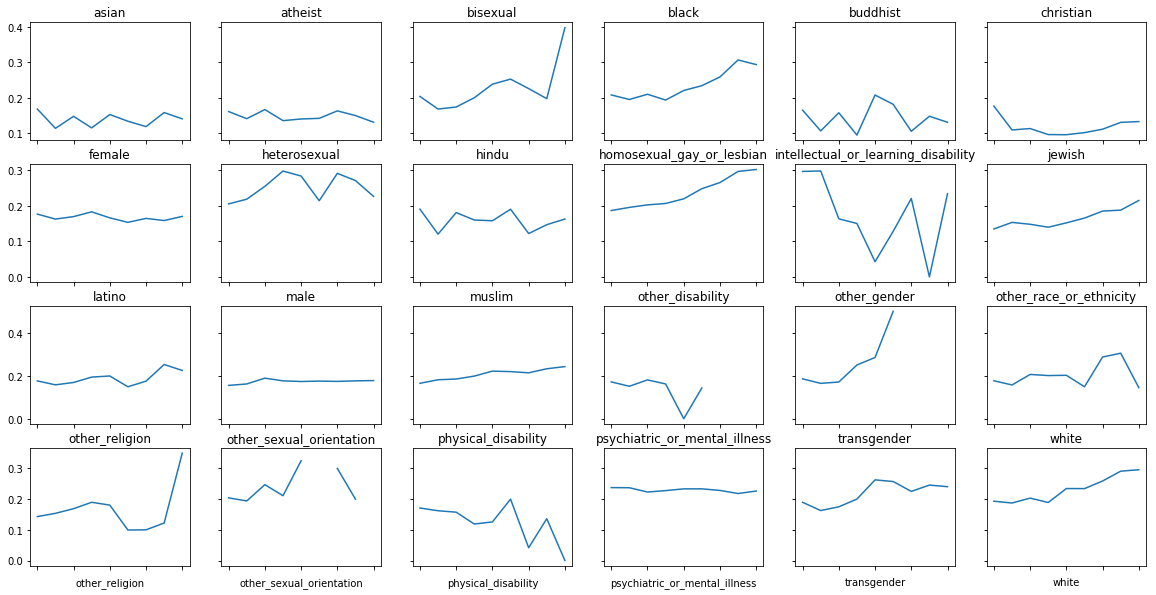

In [11]:
fig, ax = plt.subplots(4, 6, sharex='col', sharey='row', figsize=(20, 10))
for i, identity in enumerate(identities):
    ax[i // 6, i % 6].set_title(identity)
    df_without_na.groupby(pd.cut(df_without_na[identity], np.arange(0, 1.0, 0.1))).target.mean().plot(ax = ax[i // 6, i % 6])

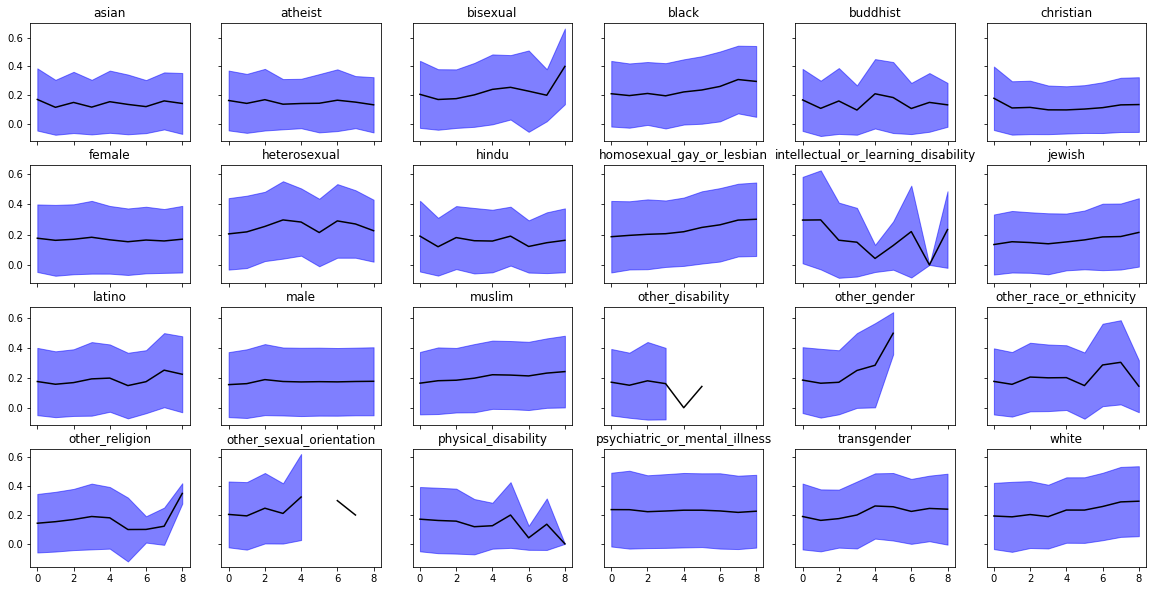

In [64]:
fig, ax = plt.subplots(4, 6, sharex='col', sharey='row', figsize=(20, 10))
for i, identity in enumerate(identities):
    ax[i // 6, i % 6].set_title(identity)
    df_temp = df_without_na.groupby(pd.cut(df_without_na[identity], np.arange(0, 1.0, 0.1))).target
    df_temp = pd.DataFrame({'mean_values': df_temp.mean(),'std_values': df_temp.std()})
    
    x = df_temp.reset_index().index
    mean = df_temp.mean_values.values
    std = df_temp.std_values.values

    ax[i // 6, i % 6].fill_between(x, mean + std, mean - std, color='blue', alpha=0.5)
    ax[i // 6, i % 6].plot(x, mean, color='black');